In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing required libraries
import pandas as pd
df=pd.read_csv(r"C:\Users\user\Desktop\dataset.csv")
import re
import nltk
#nltk.download()
#nltk.download_shell()
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
df.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [6]:
df.isna().any()

ItemID           False
Sentiment        False
SentimentText    False
dtype: bool

In [7]:
df['Sentiment'].unique()

array([0, 1], dtype=int64)

In [8]:
df.value_counts()

ItemID  Sentiment  SentimentText                                                                                                                                   
1       0                               is so sad for my APL friend.............                                                                                       1
66656   0          @bluemoonx I did too...whatever u do, don't watch &quot;2 girls 1 cup&quot; on youtube. Gross!!! Lesbos sucking tits and eating their own crap.     1
66678   0          @blues_traveler I want the Tix!  Oh, right.  I'm know where near Vacaville Ca.                                                                      1
66677   0          @bluereadergal I prolly won't be home till 3-4am at this rate                                                                                       1
66676   1          @bluerain22 thank you  *hugs* it was lovely and romantic!                                                                                    

In [9]:
pd.value_counts(df.Sentiment)

1    56457
0    43532
Name: Sentiment, dtype: int64

In [10]:
print('length of data is', len(df))

length of data is 99989


In [11]:
df. shape

(99989, 3)

In [12]:
df.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

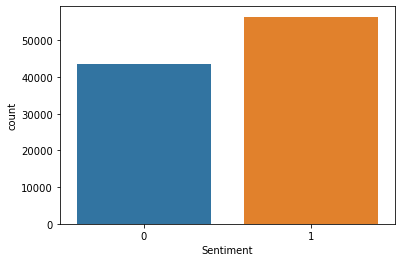

In [13]:
sns.countplot(x='Sentiment', data=df);

In [14]:
# checking out the negative comments from the train set

df[df['Sentiment'] == 0].head(10)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
7,8,0,Sunny Again Work Tomorrow :-| ...
10,11,0,I must think about positive..
12,13,0,this weekend has sucked so far
13,14,0,jb isnt showing in australia any more!
14,15,0,ok thats it you win.


In [15]:
# checking out the postive comments from the train set 

df[df['Sentiment'] == 1].head(10)

,ItemID,Sentiment,SentimentText
2,3,1,omg its already 7:30 :O
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)
11,12,1,thanks to all the haters up in my face a...
17,18,1,Feeling strangely fine. Now I'm gonna go l...
22,23,1,You're the only one who can see this cause...
28,29,1,"goodbye exams, HELLO ALCOHOL TONIGHT"
38,39,1,uploading pictures on friendster
41,42,1,(: !!!!!! - so i wrote something last week. ...


In [16]:

# adding a column to represent the length of the tweet

df['len'] = df['SentimentText'].str.len()

df.head(10)

,ItemID,Sentiment,SentimentText,len
0,1,0,is so sad for my APL frie...,61
1,2,0,I missed the New Moon trail...,51
2,3,1,omg its already 7:30 :O,37
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,i think mi bf is cheating on me!!! ...,53
5,6,0,or i just worry too much?,42
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,41
7,8,0,Sunny Again Work Tomorrow :-| ...,61
8,9,1,handed in my uniform today . i miss you ...,53
9,10,1,hmmmm.... i wonder how she my number @-),46


In [17]:
df.groupby('Sentiment').describe()

ItemID                                                      \
             count          mean           std  min       25%      50%   
Sentiment                                                                
0          43532.0  47383.876413  29754.229279  1.0  20397.75  46716.0   
1          56457.0  52026.250775  27994.983763  3.0  28281.00  52305.0   

                                  len                                         \
               75%       max    count       mean        std  min   25%   50%   
Sentiment                                                                      
0          73366.0   99998.0  43532.0  78.402945  36.910970  6.0  48.0  75.0   
1          76096.0  100000.0  56457.0  76.270135  35.822944  7.0  46.0  72.0   

                         
             75%    max  
Sentiment                
0          110.0  949.0  
1          106.0  188.0

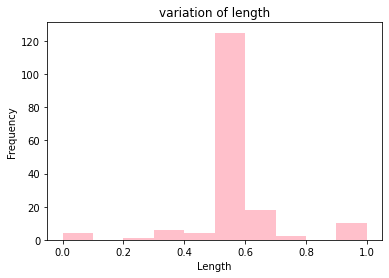

In [18]:
df.groupby('len').mean()['Sentiment'].plot.hist(color = 'pink', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

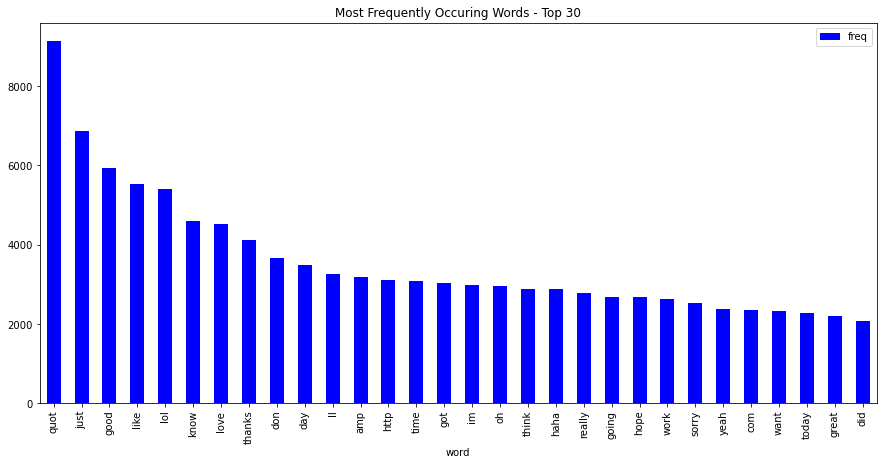

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.SentimentText)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [20]:
conda install -c conda-forge wordcloud=1.6.0 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

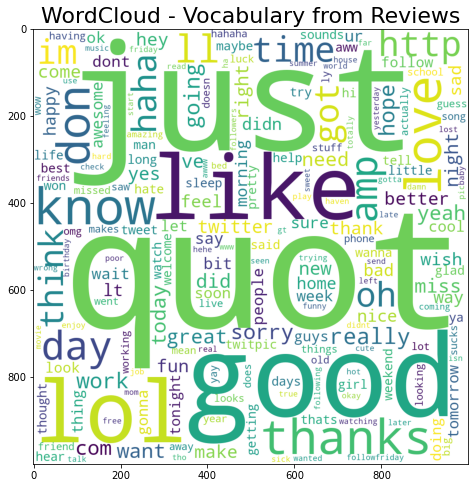

In [21]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

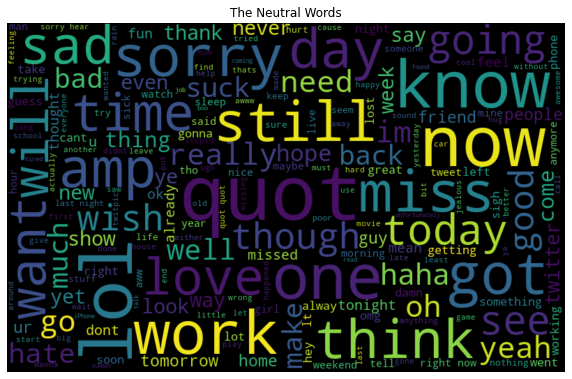

In [22]:
normal_words =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

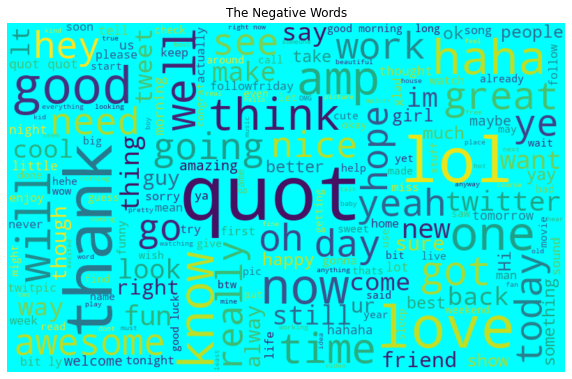

In [23]:
negative_words =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [24]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [25]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(df['SentimentText'][df['Sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['SentimentText'][df['Sentiment'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

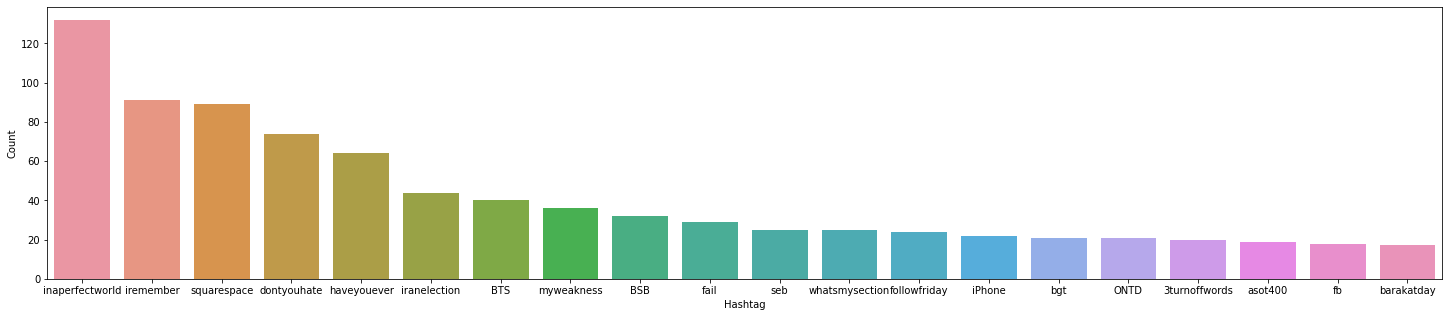

In [26]:

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(25,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

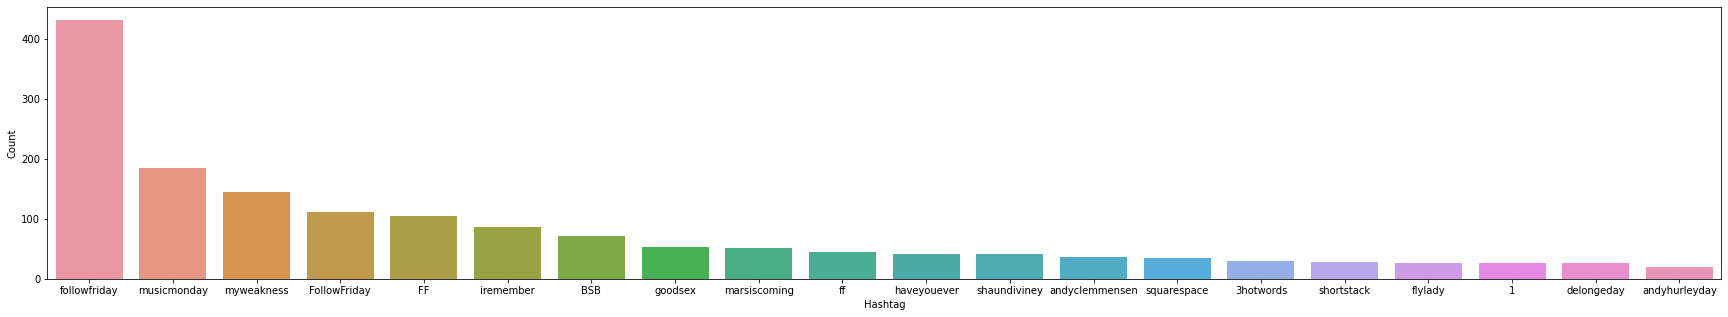

In [45]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(30,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [35]:
stemmer = nltk.SnowballStemmer("english")
STOPWORDS = stopwords.words('english')
STOPWORDS.remove('not')

#function to preprocess text by converting to lower case, removing mentions and links and stem the words and remove stopwords
def clean_text(text):
    
    text = str(text).lower()                                           # converting to lower case
    text = re.sub(r'@\S+|http\S+|www.\S+|\n','',text)                  # removing mentions and links
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)                        # removing special characters 
    
    text = [stemmer.stem(word) for word in text.split(' ')]            # stem words 
    text = " ".join([word for word in text if word not in STOPWORDS])  # remove stopwords
    text = text.strip()                                                # remove extra spaces from start and end of string
     
    return text


df['SentimentText'] = df['SentimentText'].apply(clean_text)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#creating pipeline to vectorize text and fit in the model
model = make_pipeline(TfidfVectorizer(ngram_range=(1,2)), MultinomialNB(alpha=1.0))

In [38]:
#splitting data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df['SentimentText'],df['Sentiment'],test_size =0.2 , random_state = 42)

In [39]:
#fit data to model
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('multinomialnb', MultinomialNB())])

In [40]:
#predicting test data
predicted = model.predict(X_test)

In [41]:
#evaluation using accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted)

0.7407240724072407

In [42]:
def predict_sentiment(tweet):
    tweet = clean_text(tweet)
    y = model.predict([tweet])
    if(y[0]==0):
        print('Ah! This tweet has negative vibes!')
    else:
        print('Yayy!! This tweet spreads positivity!')

In [43]:
tweet1 = ''' Government of India has decided to cancel the Class XII CBSE Board Exams. 
After extensive consultations, we have taken a decision that is student-friendly.  '''
tweet2 = ''' I am feeling very lucky today!! '''

predict_sentiment(tweet1)
predict_sentiment(tweet2)

Ah! This tweet has negative vibes!
Yayy!! This tweet spreads positivity!
